# All together now

We have now discretized the two first order equations over a single cell. What is left is to assemble and solve the DC system over the entire mesh. To implement the divergence on the full mesh, the stencil of $\pm 1$'s must index into $\mathbf{j}$ on the entire mesh (instead of four elements). Although this can be done in a \texttt{for-loop}, it is conceptually, and often computationally, easier to create this stencil using nested kronecker products (see notebook). The volume and area terms in the divergence get expanded to diagonal matrices, and we multiply them together to get the discrete divergence operator. The discretization of the \emph{face} inner product can be abstracted to a function, $\mathbf{M}_f(\sigma^{-1})$, that completes the inner product on the entire mesh at once. The main difference when implementing this is the $\mathbf{P}$ matrices, which must index into the entire mesh. 
With the necessary operators defined for both equations on the entire mesh, we are left with two discrete equations:

\begin{equation}
	\text{diag}(\mathbf{v}) \mathbf{D}\mathbf{j} = 
\mathbf{q}
\\
\mathbf{M}_f(\sigma^{-1}) \mathbf{j} = 
\mathbf{D}^\top \text{diag}(\mathbf{v}) \boldsymbol{\phi}.
\end{equation}

Note that now all variables are defined over the entire mesh. We could solve this coupled system or we could eliminate $\mathbf{j}$ and solve for $\phi$ directly (a smaller, second-order system).

\begin{equation}
	\text{diag}(\mathbf{v}) 
\mathbf{D} 
\mathbf{M}_f(\sigma^{-1})^{-1} 
\mathbf{D}^\top 
\text{diag}(\mathbf{v}) 
\boldsymbol{\phi} = 
\mathbf{q}. 
\end{equation}

By solving this system matrix, we obtain a solution for the electric potential $\phi$ everywhere in the domain. Creating predicted data from this requires an interpolation to the electrode locations and subtraction to obtain potential differences! 

Below we have wrapped up the functions in [index.ipynb](index.ipynb) in [dc_interact.py](dc_interact.py) so that we can use them with IPython widgets.

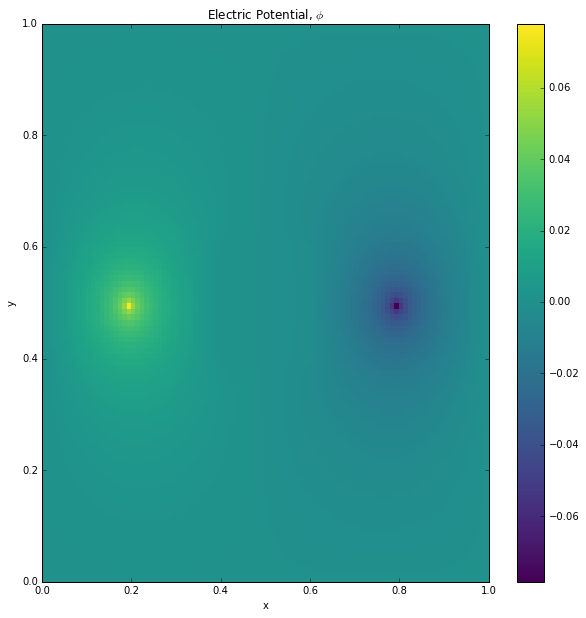

In [1]:
%matplotlib inline
from dc_interact import dc_resistivity
from ipywidgets import interact
interact(
    dc_resistivity,
    log_sigma_background=(-4,4),
    log_sigma_block=(-4,4),
    plot_type=['potential','conductivity','current']
);

Moving from continuous equations to their discrete analogues is fundamental in geophysical simulations. In this tutorial, we have started from a continuous description of the governing equations for the DC resistivity problem, selected locations on the mesh to discretize the continuous functions, constructed differential operators by considering one cell at a time, assembled and solved the discrete DC equations. Composing the finite volume system in this way allows us to move to different meshes and incorporate various types of boundary conditions that are often necessary when solving these equations in practice.

# Next up ...

To learn more about SimPEG you can go to our website http://simpeg.xyz where you can find code, documentation, presentations, more tutorials and papers!

For another DC example using a curvi mesh - start at the [SimPEG Examples](http://docs.simpeg.xyz/content/examples/Mesh_Basic_ForwardDC.html)